# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

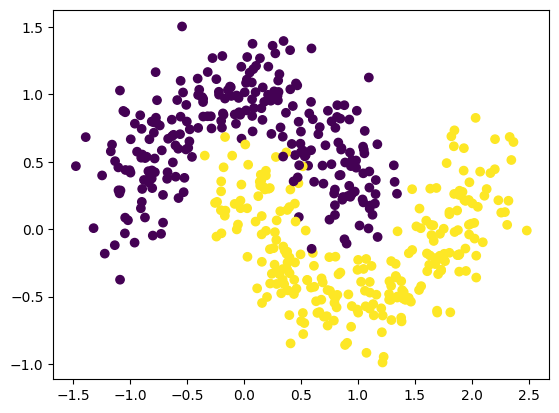

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

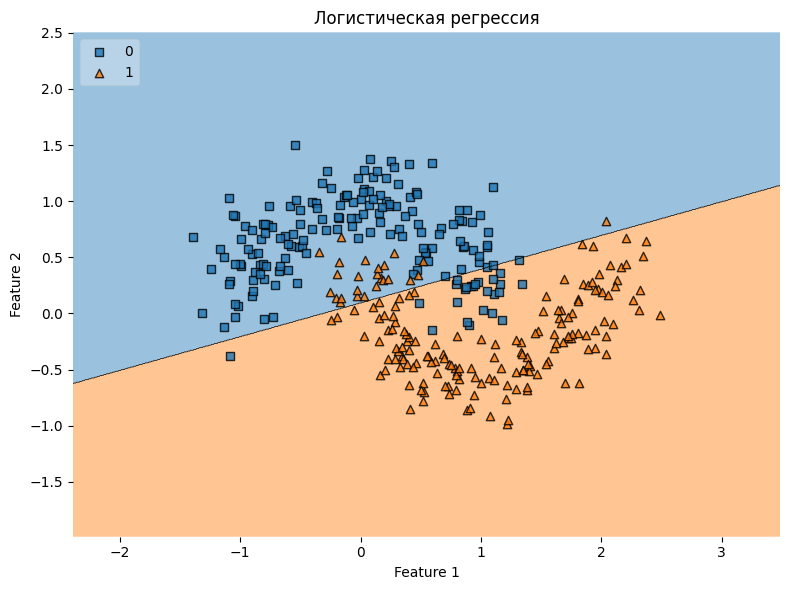

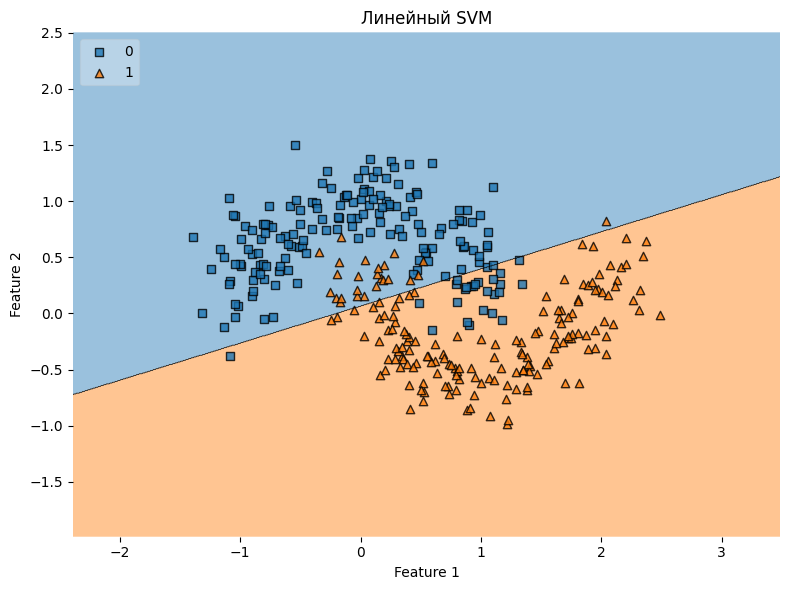

Логистическая регрессия - Точность: 0.8667, F1-мера: 0.8630
Линейный SVM - Точность: 0.8667, F1-мера: 0.8630


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

lr = LogisticRegression() # add some params
svm = SVC(kernel='linear') # here too

### YOUR CODE HERE

# Функция для отображения областей решения
def plot_decisions(X, y, estimator, title):
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X, y, clf=estimator, legend=2)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.tight_layout()
    plt.show()

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    moons_points, moons_labels, test_size=0.3, random_state=42)

# Обучим логистическую регрессию
lr = LogisticRegression(C=1.0, max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Обучим линейный SVM
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_svm = svm_linear.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Отобразим области решения
plot_decisions(X_train, y_train, lr, 'Логистическая регрессия')
plot_decisions(X_train, y_train, svm_linear, 'Линейный SVM')

# Выведем метрики
print(f"Логистическая регрессия - Точность: {accuracy_lr:.4f}, F1-мера: {f1_lr:.4f}")
print(f"Линейный SVM - Точность: {accuracy_svm:.4f}, F1-мера: {f1_svm:.4f}")

Описание результатов: И логистическая регрессия, и линейный SVM демонстрируют посредственные результаты на данных "moons", поскольку эти данные не являются линейно разделимыми. Обе модели пытаются провести прямую линию для разделения классов, что невозможно для данных полумесяца.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

SVM с ядром poly - Точность: 0.7867, F1-мера: 0.8118


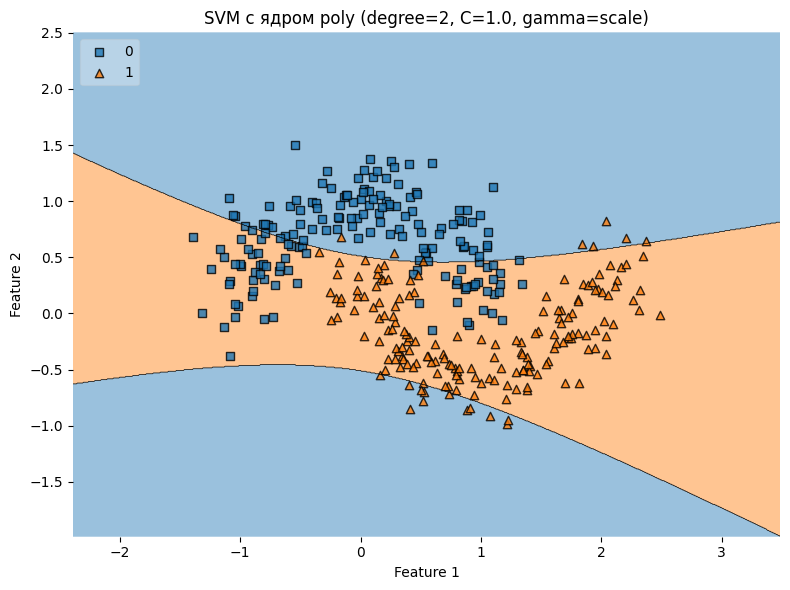

SVM с ядром poly - Точность: 0.9067, F1-мера: 0.9091


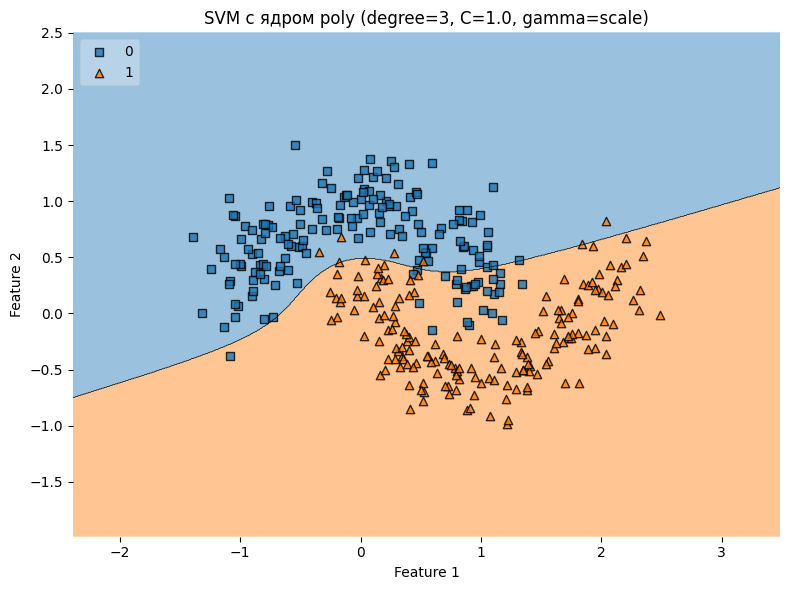

SVM с ядром poly - Точность: 0.7333, F1-мера: 0.6875


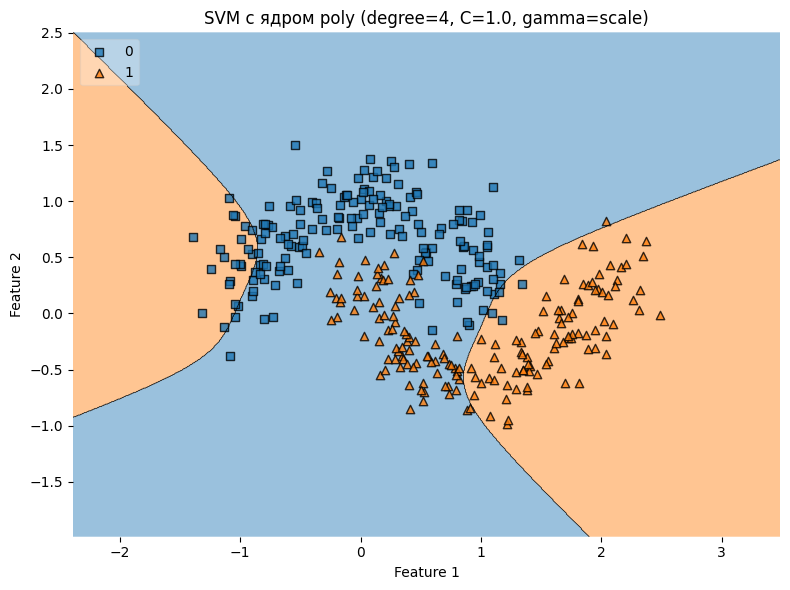

SVM с ядром rbf - Точность: 0.9800, F1-мера: 0.9796


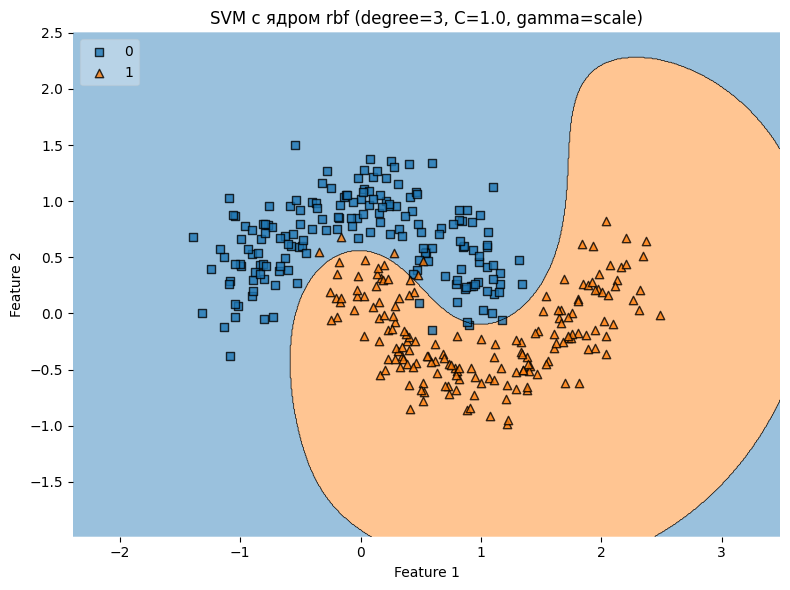

SVM с ядром sigmoid - Точность: 0.6200, F1-мера: 0.6225


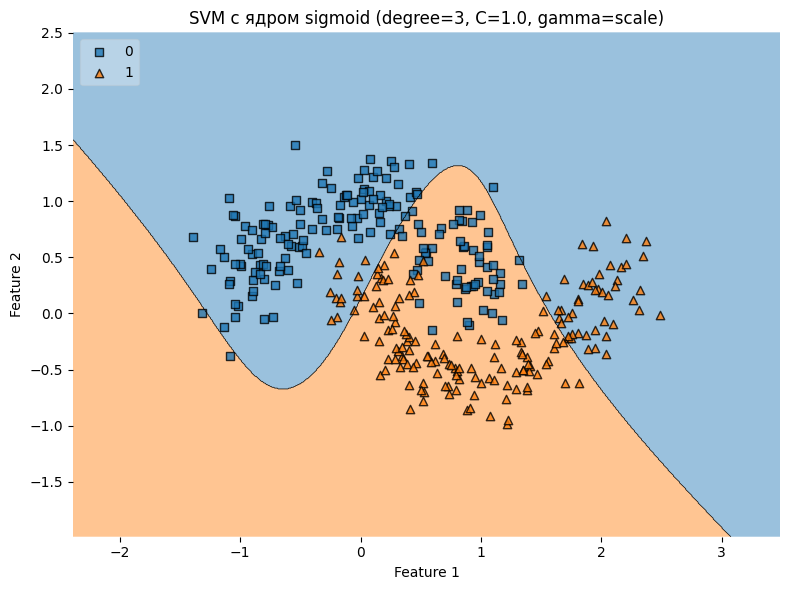

In [10]:
### YOUR CODE HERE
# Функция для оценки SVM с разными ядрами
def evaluate_svm_kernel(kernel, degree=3, C=1.0, gamma='scale'):
    svm = SVC(kernel=kernel, degree=degree, C=C, gamma=gamma, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"SVM с ядром {kernel} - Точность: {accuracy:.4f}, F1-мера: {f1:.4f}")
    plot_decisions(X_train, y_train, svm, f'SVM с ядром {kernel} (degree={degree}, C={C}, gamma={gamma})')
    
    return svm, accuracy, f1

# Полиномиальное ядро с разными степенями
poly_results = []
for degree in [2, 3, 4]:
    svm_poly, acc, f1 = evaluate_svm_kernel('poly', degree=degree, C=1.0)
    poly_results.append((degree, acc, f1))

# RBF ядро
svm_rbf, acc_rbf, f1_rbf = evaluate_svm_kernel('rbf', C=1.0, gamma='scale')

# Сигмоидальное ядро
svm_sigmoid, acc_sigmoid, f1_sigmoid = evaluate_svm_kernel('sigmoid', C=1.0, gamma='scale')

#### Description of the results:

The classification quality has improved significantly compared to linear models. 

When the RBF core shows the best results of > 97%, it turns out that it is able to create nonlinear decision boundaries that are ideally suited for the "moons" data.

The polynomial kernel also works well, especially at degree=3, which is enough to model crescent moon data without overfitting.

The boundaries of the solution have changed from straight lines to curves that better match the shape of the data.

The optimal degree value for a polynomial kernel is 3, as it provides good accuracy without overfitting. 

Higher degrees give more convoluted boundaries, which can lead to overfitting.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

Логистическая регрессия с полиномиальными признаками (degree=2) - Точность: 0.8667, F1-мера: 0.8630


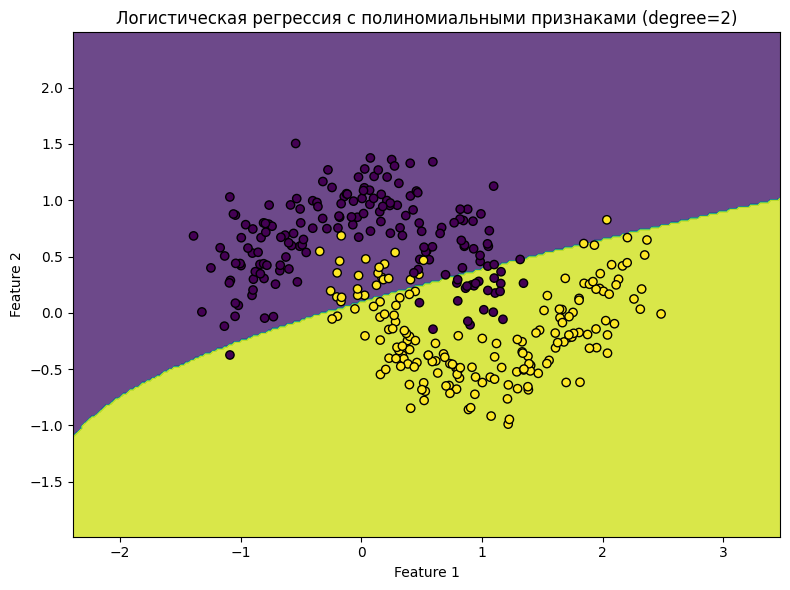

Логистическая регрессия с полиномиальными признаками (degree=3) - Точность: 0.9533, F1-мера: 0.9517


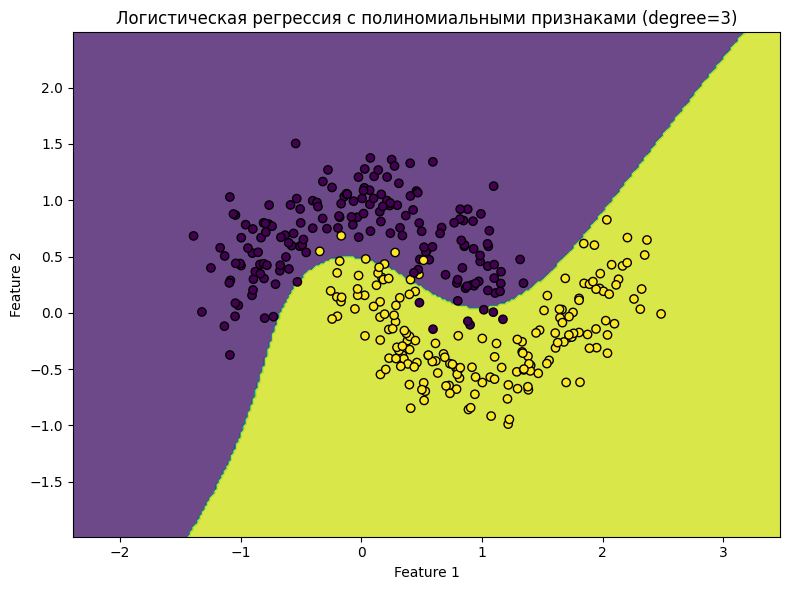

Логистическая регрессия с полиномиальными признаками (degree=4) - Точность: 0.9533, F1-мера: 0.9517


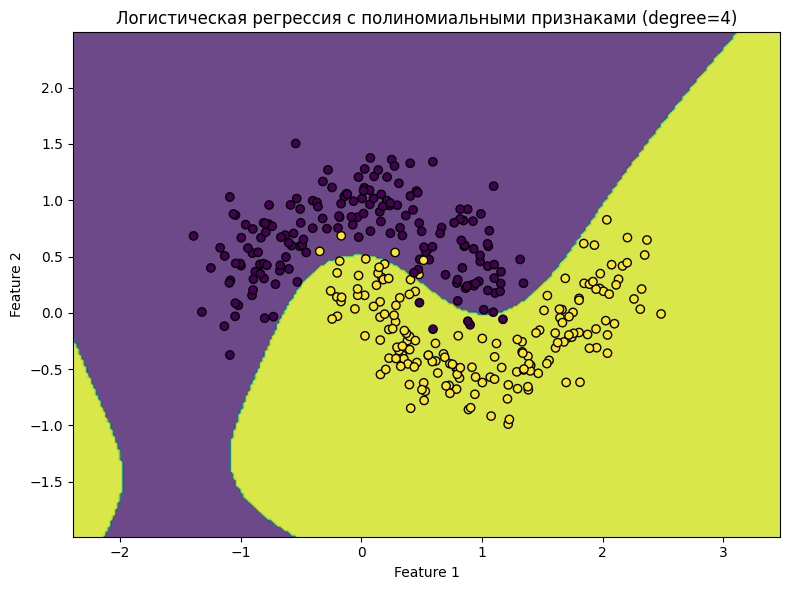

In [11]:
from sklearn.preprocessing import PolynomialFeatures

### YOUR CODE HERE
from sklearn.pipeline import Pipeline

# Функция для оценки логистической регрессии с полиномиальными признаками
def evaluate_poly_lr(degree):
    # Создаем конвейер с полиномиальными признаками и логистической регрессией
    poly_lr = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('lr', LogisticRegression(C=1.0, max_iter=1000, random_state=42))
    ])
    
    # Обучаем на тренировочных данных
    poly_lr.fit(X_train, y_train)
    
    # Оцениваем модель
    y_pred = poly_lr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Логистическая регрессия с полиномиальными признаками (degree={degree}) - Точность: {accuracy:.4f}, F1-мера: {f1:.4f}")
    
    # Визуализация границ решения для конвейера
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = poly_lr.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
    plt.title(f'Логистическая регрессия с полиномиальными признаками (degree={degree})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.tight_layout()
    plt.show()
    
    return poly_lr, accuracy, f1

# Оцениваем модель с разными степенями полинома
poly_lr_results = []
for degree in [2, 3, 4]:
    lr_model, acc, f1 = evaluate_poly_lr(degree)
    poly_lr_results.append((degree, acc, f1))

#### Comparison with SVM results:

* Logistic regression with polynomial features achieves results comparable to SVM with a polynomial core, with the same degree of polynomial.
* For this data, the optimal degree of the polynomial is also 3, which corresponds to the optimal degree for SVM.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

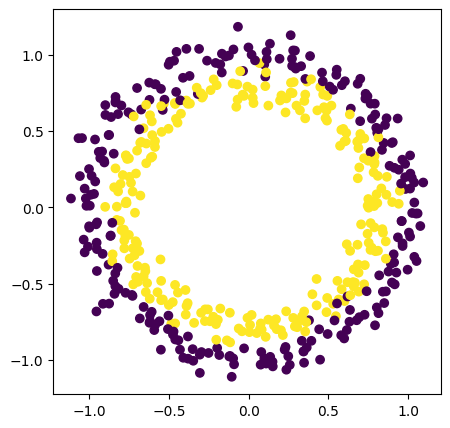

In [15]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

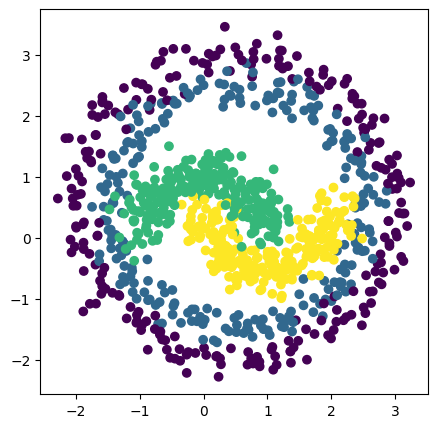

In [16]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

Логистическая регрессия с полиномиальными признаками (degree=3) - Точность: 0.9067, F1-мера: 0.9068


/home/andrej/study/girafe/.venv/lib/python3.12/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


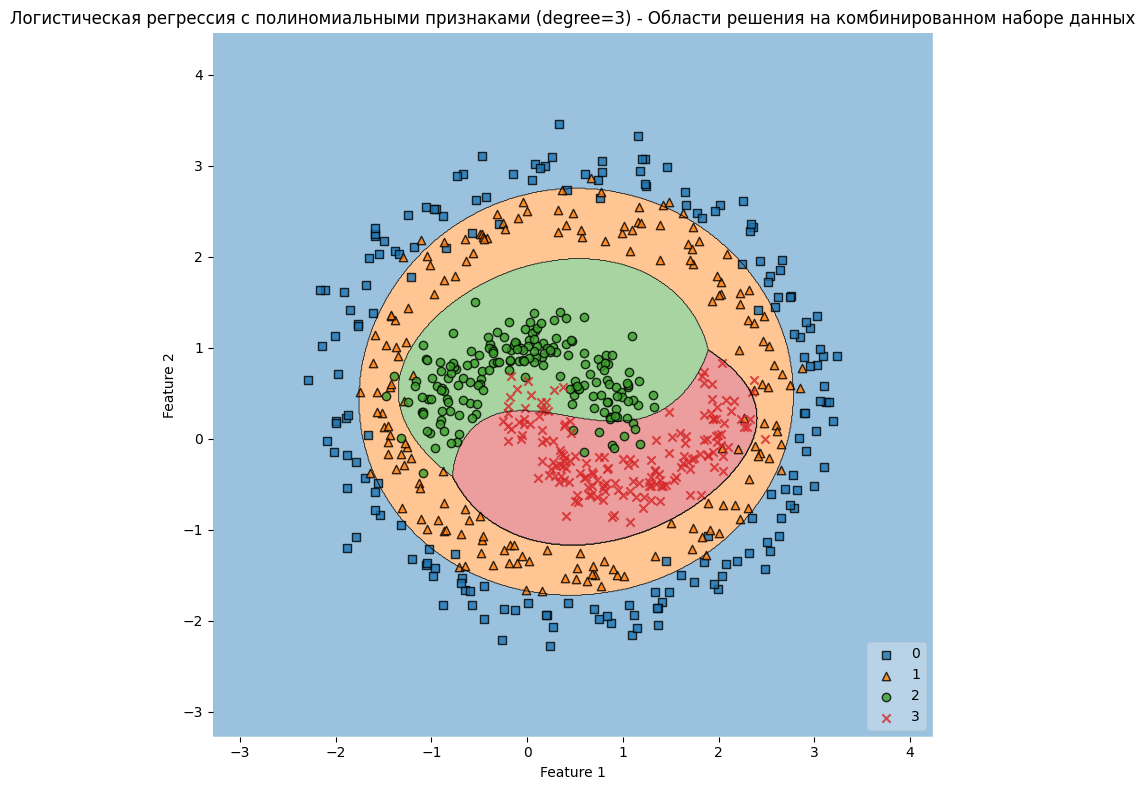

SVM с RBF ядром - Точность: 0.9500, F1-мера: 0.9501


/home/andrej/study/girafe/.venv/lib/python3.12/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


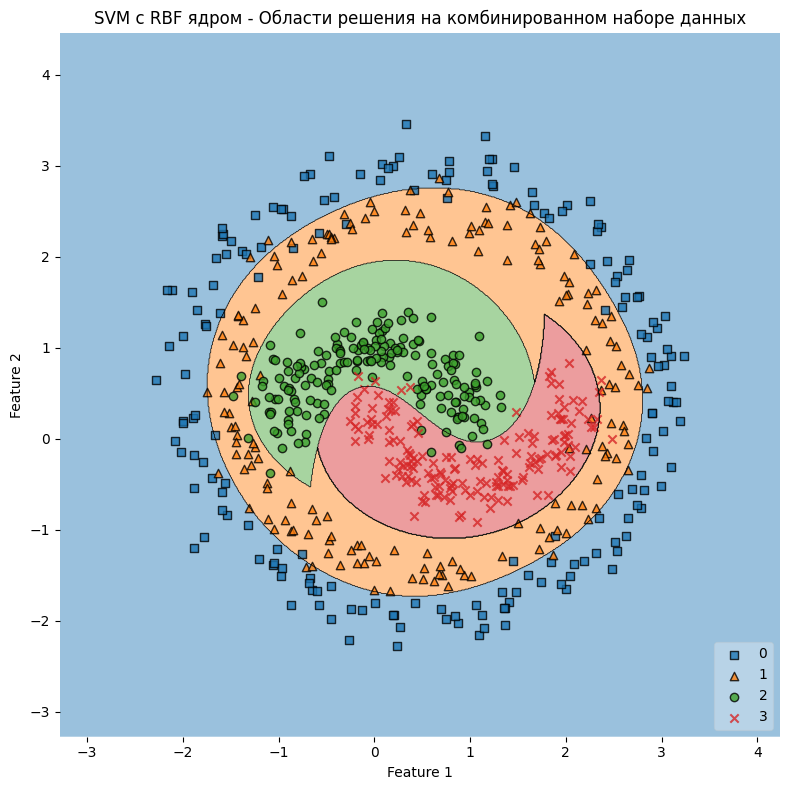

SVM с полиномиальным ядром (degree=3) - Точность: 0.5433, F1-мера: 0.4858


/home/andrej/study/girafe/.venv/lib/python3.12/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


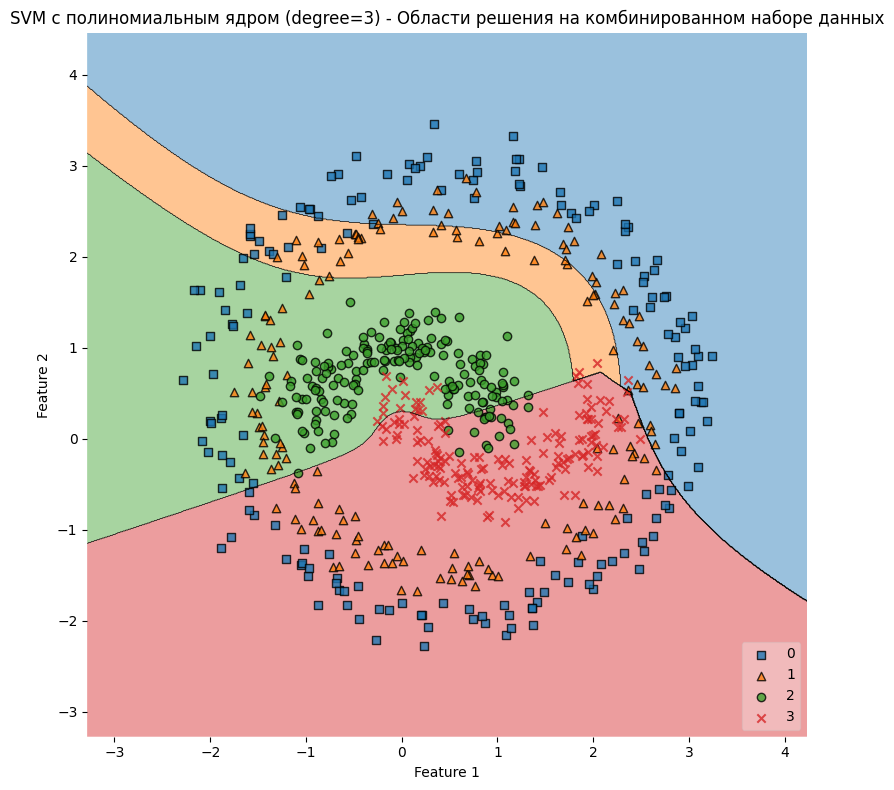

Случайный лес - Точность: 0.8967, F1-мера: 0.8957


/home/andrej/study/girafe/.venv/lib/python3.12/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


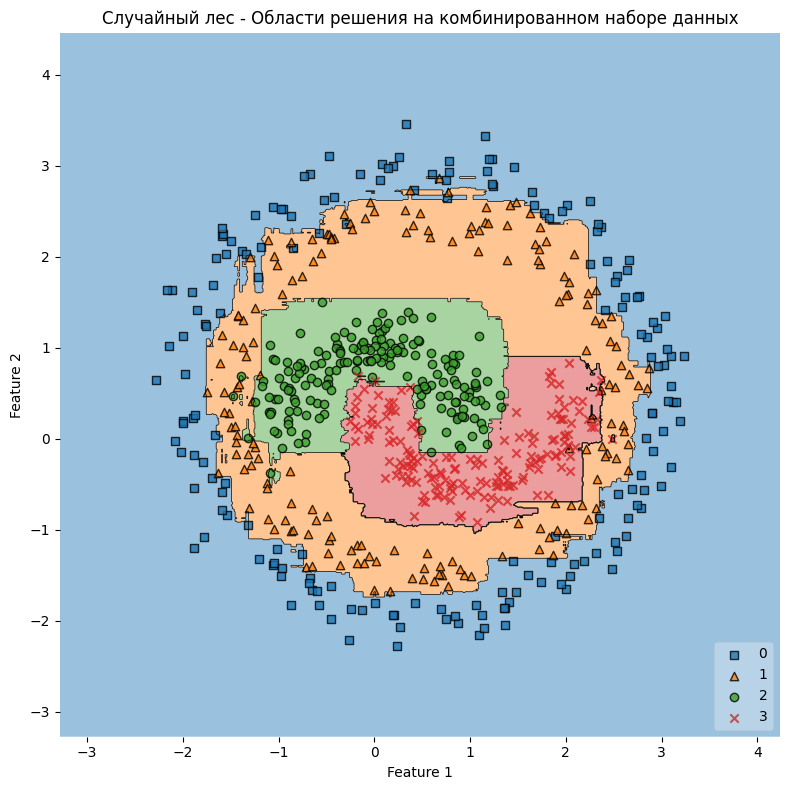

In [17]:
### YOUR CODE HERE

# Разделим комбинированные данные на обучающую и тестовую выборки
X_combined_train, X_combined_test, y_combined_train, y_combined_test = train_test_split(points, labels, test_size=0.3, random_state=42)

# Функция для оценки моделей на комбинированном наборе данных
def evaluate_model_combined(model, model_name):
    model.fit(X_combined_train, y_combined_train)
    y_pred = model.predict(X_combined_test)
    
    # Так как это задача многоклассовой классификации
    accuracy = accuracy_score(y_combined_test, y_pred)
    f1 = f1_score(y_combined_test, y_pred, average='weighted')
    
    print(f"{model_name} - Точность: {accuracy:.4f}, F1-мера: {f1:.4f}")
    
    # Отображаем области решения
    plt.figure(figsize=(8, 8))
    plot_decision_regions(X_combined_train, y_combined_train, clf=model, legend=4)
    plt.title(f'{model_name} - Области решения на комбинированном наборе данных')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.tight_layout()
    plt.show()
    
    return accuracy, f1

# Логистическая регрессия с полиномиальными признаками
poly_lr_combined = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('lr', LogisticRegression(C=1.0, max_iter=2000, random_state=42))
])
acc_poly_lr, f1_poly_lr = evaluate_model_combined(poly_lr_combined, 'Логистическая регрессия с полиномиальными признаками (degree=3)')

# SVM с RBF ядром
svm_rbf_combined = SVC(kernel='rbf', C=10.0, gamma='scale', random_state=42)
acc_svm_rbf, f1_svm_rbf = evaluate_model_combined(svm_rbf_combined, 'SVM с RBF ядром')

# SVM с полиномиальным ядром
svm_poly_combined = SVC(kernel='poly', degree=3, C=10.0, gamma='scale', random_state=42)
acc_svm_poly, f1_svm_poly = evaluate_model_combined(svm_poly_combined, 'SVM с полиномиальным ядром (degree=3)')

# Добавим ещё одну модель - Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_combined = RandomForestClassifier(n_estimators=100, random_state=42)
acc_rf, f1_rf = evaluate_model_combined(rf_combined, 'Случайный лес')

#### Justification of the results:

* SVM with RBF core shows the best results accuracy: 0.9500, F1-measure: 0.9501. It turns out that the model is more flexible for creating complex nonlinear boundaries.
* Logistic regression with polynomial features (degree=3) also showed high results
* The SVM with a polynomial core (degree=3) turned out to be significantly worse than other models, showing an accuracy of only about 54%. In my opinion, this was expected because he performed poorly in the previous task.
* A random forest shows good results close to logistic regression with polynomial features (degree=3).

##### For this complex dataset, SVM with RBF core is the most efficient way to predict.